In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pydae.grid_tools as gt
import pydae.ssa as ssa
from IPython.core.display import HTML,SVG
from pydae.svg_tools import svg
import scipy.optimize as sopt
%config InlineBackend.figure_formats = ['svg']
import numba as nb
import time

## Kundur example 12.6 with PSS

In [2]:
SVG('https://raw.githubusercontent.com/pydae/pydae/master/examples/grids/k12p6/sp_k12p6.svg')

HTTPError: HTTP Error 404: Not Found

In [4]:
from k12p6_pss import k12p6_pss_class

In [5]:
grid = k12p6_pss_class()



## Initialization

In [6]:
xy_0_dict = {
"V_1":1.0,"V_2":1.0,"V_3":1.0,"V_4":1.0,
"V_5":1.0,"V_6":1.0,"V_7":1.0,"V_8":1.0,
"V_9":1.0,"V_10":1.0,"V_11":1.0
}

In [7]:
grid = k12p6_pss_class()

K_delta = 0.001
K_sec = 0.01
K_a = 200.0
T_r = 0.02
D = 0.1
lf = 1.0
params = {'P_7':-967e6*lf,'P_9':-1_767e6*lf,'Q_7':100e6*lf,'Q_9':250e6*lf,
                  'K_delta_1':K_delta,'K_delta_2':0,
                  'K_delta_3':0,'K_delta_4':0,
                  'K_a_1':K_a,'K_a_2':K_a,'K_a_3':K_a,'K_a_4':K_a,
                  #'T_r_1':T_r,'T_r_2':T_r,'T_r_3':T_r,'T_r_4':T_r,
                  'p_c_1':701.4/900*lf,'p_c_2':701.4/900*lf,'p_c_4':701.4/900*lf,
                  'v_ref_1':1.03,'v_ref_2':1.01,'v_ref_3':1.03,'v_ref_4':1.01,
                     'K_sec_1':0,'K_sec_2':0,'K_sec_3':K_sec,'K_sec_4':0,
                  'K_imw_1':0.001, 'K_imw_2':0.001,'K_imw_3':0.0, 'K_imw_4':0.001,
                  'D_1':D,'D_2':D,'D_3':D,'D_4':D
                    }

#grid.xy_0  = grid.xy_prev[:,0]

grid.ini(params,xy_0='xy_0.json')
grid.eval_preconditioner_ini()
grid.spini(params,xy_0='xy_0.json')

C:\Users\jmmau\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:407: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [8]:
%timeit grid.spini(params,xy_0='xy_0.json')

3.06 ms ± 462 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
import numba
import math

In [126]:
t_0 = time.time()


cc = CC('jac_mod2')

#@numba.njit('(float64[:,:],float64[:],float64[:],float64[:],float64[:])')
#@numba.njit
@cc.export('jac_ini_eval', '(float64[:,:],float64[:],float64[:],float64[:],float64[:])')
def jac_ini_ss_eval_xy(jac_ini,x,y,u,p):
    

    jac_ini[1,0] = (-y[0]*y[22]*1*(x[0] - y[1]) + y[0]*y[23]*1*(x[0] - y[1]))/(2*p[44]) +1
    jac_ini[1,45] = (-y[22]*1*(x[0] - y[1]) - y[23]*1*(x[0] - y[1]))/(2*p[44])
    jac_ini[1,46] = (y[0]*y[22]*1*(x[0] - y[1]) - y[0]*y[23]*1*(x[0] - y[1]))/(2*p[44])
    jac_ini[1,67] = (-2*p[52]*y[22] - y[0]*1*(x[0] - y[1]))/(2*p[44])
    jac_ini[1,68] = (-2*p[52]*y[23] - y[0]*1*(x[0] - y[1]))/(2*p[44])
    jac_ini[12,11] = (-y[2]*y[31]*1*(x[11] - y[3]) + y[2]*y[32]*1*(x[11] - y[3]))/(2*p[74])
    jac_ini[12,47] = (-y[31]*1*(x[11] - y[3]) - y[32]*1*(x[11] - y[3]))/(2*p[74])
    jac_ini[12,48] = (y[2]*y[31]*1*(x[11] - y[3]) - y[2]*y[32]*1*(x[11] - y[3]))/(2*p[74])
    jac_ini[12,76] = (-2*p[82]*y[31] - y[2]*1*(x[11] - y[3]))/(2*p[74])
    jac_ini[12,77] = (-2*p[82]*y[32] - y[2]*1*(x[11] - y[3]))/(2*p[74])
    jac_ini[23,22] = (-y[4]*y[40]*1*(x[22] - y[5]) + y[4]*y[41]*1*(x[22] - y[5]))/(2*p[104])
    jac_ini[23,49] = (-y[40]*1*(x[22] - y[5]) - y[41]*1*(x[22] - y[5]))/(2*p[104])
    jac_ini[23,50] = (y[4]*y[40]*1*(x[22] - y[5]) - y[4]*y[41]*1*(x[22] - y[5]))/(2*p[104])
    jac_ini[23,85] = (-2*p[112]*y[40] - y[4]*1*(x[22] - y[5]))/(2*p[104])
    jac_ini[23,86] = (-2*p[112]*y[41] - y[4]*1*(x[22] - y[5]))/(2*p[104])
    jac_ini[34,33] = (-y[6]*y[49]*1*(x[33] - y[7]) + y[6]*y[50]*1*(x[33] - y[7]))/(2*p[134])
    jac_ini[34,51] = (-y[49]*1*(x[33] - y[7]) - y[50]*1*(x[33] - y[7]))/(2*p[134])
    jac_ini[34,52] = (y[6]*y[49]*1*(x[33] - y[7]) - y[6]*y[50]*1*(x[33] - y[7]))/(2*p[134])
    jac_ini[34,94] = (-2*p[142]*y[49] - y[6]*1*(x[33] - y[7]))/(2*p[134])
    jac_ini[34,95] = (-2*p[142]*y[50] - y[6]*1*(x[33] - y[7]))/(2*p[134])
    jac_ini[45,45] = 2*y[0]*p[1] + y[8]*(-p[2]*1*(y[1] - y[9]) - p[1]*1*(y[1] - y[9]))
    jac_ini[45,46] = y[0]*y[8]*(-p[2]*1*(y[1] - y[9]) + p[1]*1*(y[1] - y[9]))
    jac_ini[45,53] = y[0]*(-p[2]*1*(y[1] - y[9]) - p[1]*1*(y[1] - y[9]))
    jac_ini[45,54] = y[0]*y[8]*(p[2]*1*(y[1] - y[9]) - p[1]*1*(y[1] - y[9]))
    jac_ini[46,45] = 2*y[0]*(-p[2] - p[3]/2) + y[8]*(p[2]*1*(y[1] - y[9]) - p[1]*1*(y[1] - y[9]))
    jac_ini[46,46] = y[0]*y[8]*(-p[2]*1*(y[1] - y[9]) - p[1]*1*(y[1] - y[9]))
    jac_ini[46,53] = y[0]*(p[2]*1*(y[1] - y[9]) - p[1]*1*(y[1] - y[9]))
    jac_ini[46,54] = y[0]*y[8]*(p[2]*1*(y[1] - y[9]) + p[1]*1*(y[1] - y[9]))
    jac_ini[47,47] = 2*y[2]*p[4] + y[10]*(-p[5]*1*(y[3] - y[11]) - p[4]*1*(y[3] - y[11]))
    jac_ini[47,48] = y[2]*y[10]*(-p[5]*1*(y[3] - y[11]) + p[4]*1*(y[3] - y[11]))
    jac_ini[47,55] = y[2]*(-p[5]*1*(y[3] - y[11]) - p[4]*1*(y[3] - y[11]))
    jac_ini[47,56] = y[2]*y[10]*(p[5]*1*(y[3] - y[11]) - p[4]*1*(y[3] - y[11]))
    jac_ini[48,47] = 2*y[2]*(-p[5] - p[6]/2) + y[10]*(p[5]*1*(y[3] - y[11]) - p[4]*1*(y[3] - y[11]))
    jac_ini[48,48] = y[2]*y[10]*(-p[5]*1*(y[3] - y[11]) - p[4]*1*(y[3] - y[11]))
    jac_ini[48,55] = y[2]*(p[5]*1*(y[3] - y[11]) - p[4]*1*(y[3] - y[11]))
    jac_ini[48,56] = y[2]*y[10]*(p[5]*1*(y[3] - y[11]) + p[4]*1*(y[3] - y[11]))
    jac_ini[49,49] = y[20]*(p[8]*1*(y[21] - y[5]) - p[7]*1*(y[21] - y[5])) + 2*y[4]*p[7]
    jac_ini[49,50] = y[20]*y[4]*(-p[8]*1*(y[21] - y[5]) - p[7]*1*(y[21] - y[5]))
    jac_ini[49,65] = y[4]*(p[8]*1*(y[21] - y[5]) - p[7]*1*(y[21] - y[5]))
    jac_ini[49,66] = y[20]*y[4]*(p[8]*1*(y[21] - y[5]) + p[7]*1*(y[21] - y[5]))
    jac_ini[50,49] = y[20]*(p[8]*1*(y[21] - y[5]) + p[7]*1*(y[21] - y[5])) + 2*y[4]*(-p[8] - p[9]/2)
    jac_ini[50,50] = y[20]*y[4]*(p[8]*1*(y[21] - y[5]) - p[7]*1*(y[21] - y[5]))
    jac_ini[50,65] = y[4]*(p[8]*1*(y[21] - y[5]) + p[7]*1*(y[21] - y[5]))
    jac_ini[50,66] = y[20]*y[4]*(-p[8]*1*(y[21] - y[5]) + p[7]*1*(y[21] - y[5]))
    jac_ini[51,51] = y[18]*(p[11]*1*(y[19] - y[7]) - p[10]*1*(y[19] - y[7])) + 2*y[6]*p[10]
    jac_ini[51,52] = y[18]*y[6]*(-p[11]*1*(y[19] - y[7]) - p[10]*1*(y[19] - y[7]))
    jac_ini[51,63] = y[6]*(p[11]*1*(y[19] - y[7]) - p[10]*1*(y[19] - y[7]))
    jac_ini[51,64] = y[18]*y[6]*(p[11]*1*(y[19] - y[7]) + p[10]*1*(y[19] - y[7]))
    jac_ini[52,51] = y[18]*(p[11]*1*(y[19] - y[7]) + p[10]*1*(y[19] - y[7])) + 2*y[6]*(-p[11] - p[12]/2)
    jac_ini[52,52] = y[18]*y[6]*(p[11]*1*(y[19] - y[7]) - p[10]*1*(y[19] - y[7]))
    jac_ini[52,63] = y[6]*(p[11]*1*(y[19] - y[7]) + p[10]*1*(y[19] - y[7]))
    jac_ini[52,64] = y[18]*y[6]*(-p[11]*1*(y[19] - y[7]) + p[10]*1*(y[19] - y[7]))
    jac_ini[53,45] = y[8]*(p[2]*1*(y[1] - y[9]) - p[1]*1*(y[1] - y[9]))
    jac_ini[53,46] = y[0]*y[8]*(p[2]*1*(y[1] - y[9]) + p[1]*1*(y[1] - y[9]))
    jac_ini[53,53] = y[0]*(p[2]*1*(y[1] - y[9]) - p[1]*1*(y[1] - y[9])) + 2*y[8]*(p[1] + p[13]) + y[10]*(-p[14]*1*(y[9] - y[11]) - p[13]*1*(y[9] - y[11]))
    jac_ini[53,54] = y[0]*y[8]*(-p[2]*1*(y[1] - y[9]) - p[1]*1*(y[1] - y[9])) + y[8]*y[10]*(-p[14]*1*(y[9] - y[11]) + p[13]*1*(y[9] - y[11]))
    jac_ini[53,55] = y[8]*(-p[14]*1*(y[9] - y[11]) - p[13]*1*(y[9] - y[11]))
    jac_ini[53,56] = y[8]*y[10]*(p[14]*1*(y[9] - y[11]) - p[13]*1*(y[9] - y[11]))
    jac_ini[54,45] = y[8]*(p[2]*1*(y[1] - y[9]) + p[1]*1*(y[1] - y[9]))
    jac_ini[54,46] = y[0]*y[8]*(-p[2]*1*(y[1] - y[9]) + p[1]*1*(y[1] - y[9]))
    jac_ini[54,53] = y[0]*(p[2]*1*(y[1] - y[9]) + p[1]*1*(y[1] - y[9])) + 2*y[8]*(-p[2] - p[14] - p[3]/2 - p[15]/2) + y[10]*(p[14]*1*(y[9] - y[11]) - p[13]*1*(y[9] - y[11]))
    jac_ini[54,54] = y[0]*y[8]*(p[2]*1*(y[1] - y[9]) - p[1]*1*(y[1] - y[9])) + y[8]*y[10]*(-p[14]*1*(y[9] - y[11]) - p[13]*1*(y[9] - y[11]))
    jac_ini[54,55] = y[8]*(p[14]*1*(y[9] - y[11]) - p[13]*1*(y[9] - y[11]))
    jac_ini[54,56] = y[8]*y[10]*(p[14]*1*(y[9] - y[11]) + p[13]*1*(y[9] - y[11]))
    jac_ini[55,47] = y[10]*(p[5]*1*(y[3] - y[11]) - p[4]*1*(y[3] - y[11]))
    jac_ini[55,48] = y[2]*y[10]*(p[5]*1*(y[3] - y[11]) + p[4]*1*(y[3] - y[11]))
    jac_ini[55,53] = y[10]*(p[14]*1*(y[9] - y[11]) - p[13]*1*(y[9] - y[11]))
    jac_ini[55,54] = y[8]*y[10]*(p[14]*1*(y[9] - y[11]) + p[13]*1*(y[9] - y[11]))
    jac_ini[55,55] = y[2]*(p[5]*1*(y[3] - y[11]) - p[4]*1*(y[3] - y[11])) + y[8]*(p[14]*1*(y[9] - y[11]) - p[13]*1*(y[9] - y[11])) + 2*y[10]*(p[4] + p[13] + p[16]) + y[12]*(-p[17]*1*(y[11] - y[13]) - p[16]*1*(y[11] - y[13]))
    jac_ini[55,56] = y[2]*y[10]*(-p[5]*1*(y[3] - y[11]) - p[4]*1*(y[3] - y[11])) + y[8]*y[10]*(-p[14]*1*(y[9] - y[11]) - p[13]*1*(y[9] - y[11])) + y[10]*y[12]*(-p[17]*1*(y[11] - y[13]) + p[16]*1*(y[11] - y[13]))
    jac_ini[55,57] = y[10]*(-p[17]*1*(y[11] - y[13]) - p[16]*1*(y[11] - y[13]))
    jac_ini[55,58] = y[10]*y[12]*(p[17]*1*(y[11] - y[13]) - p[16]*1*(y[11] - y[13]))
    jac_ini[56,47] = y[10]*(p[5]*1*(y[3] - y[11]) + p[4]*1*(y[3] - y[11]))
    jac_ini[56,48] = y[2]*y[10]*(-p[5]*1*(y[3] - y[11]) + p[4]*1*(y[3] - y[11]))
    jac_ini[56,53] = y[10]*(p[14]*1*(y[9] - y[11]) + p[13]*1*(y[9] - y[11]))
    jac_ini[56,54] = y[8]*y[10]*(-p[14]*1*(y[9] - y[11]) + p[13]*1*(y[9] - y[11]))
    jac_ini[56,55] = y[2]*(p[5]*1*(y[3] - y[11]) + p[4]*1*(y[3] - y[11])) + y[8]*(p[14]*1*(y[9] - y[11]) + p[13]*1*(y[9] - y[11])) + 2*y[10]*(-p[5] - p[14] - p[17] - p[6]/2 - p[15]/2 - p[18]/2) + y[12]*(p[17]*1*(y[11] - y[13]) - p[16]*1*(y[11] - y[13]))
    jac_ini[56,56] = y[2]*y[10]*(p[5]*1*(y[3] - y[11]) - p[4]*1*(y[3] - y[11])) + y[8]*y[10]*(p[14]*1*(y[9] - y[11]) - p[13]*1*(y[9] - y[11])) + y[10]*y[12]*(-p[17]*1*(y[11] - y[13]) - p[16]*1*(y[11] - y[13]))
    jac_ini[56,57] = y[10]*(p[17]*1*(y[11] - y[13]) - p[16]*1*(y[11] - y[13]))
    jac_ini[56,58] = y[10]*y[12]*(p[17]*1*(y[11] - y[13]) + p[16]*1*(y[11] - y[13]))
    jac_ini[57,55] = y[12]*(p[17]*1*(y[11] - y[13]) - p[16]*1*(y[11] - y[13]))
    jac_ini[57,56] = y[10]*y[12]*(p[17]*1*(y[11] - y[13]) + p[16]*1*(y[11] - y[13]))
    jac_ini[57,57] = y[10]*(p[17]*1*(y[11] - y[13]) - p[16]*1*(y[11] - y[13])) + 2*y[12]*(p[16] + 2*p[19]) + y[14]*(-2*p[20]*1*(y[13] - y[15]) - 2*p[19]*1*(y[13] - y[15]))
    jac_ini[57,58] = y[10]*y[12]*(-p[17]*1*(y[11] - y[13]) - p[16]*1*(y[11] - y[13])) + y[12]*y[14]*(-2*p[20]*1*(y[13] - y[15]) + 2*p[19]*1*(y[13] - y[15]))
    jac_ini[57,59] = y[12]*(-2*p[20]*1*(y[13] - y[15]) - 2*p[19]*1*(y[13] - y[15]))
    jac_ini[57,60] = y[12]*y[14]*(2*p[20]*1*(y[13] - y[15]) - 2*p[19]*1*(y[13] - y[15]))
    jac_ini[58,55] = y[12]*(p[17]*1*(y[11] - y[13]) + p[16]*1*(y[11] - y[13]))
    jac_ini[58,56] = y[10]*y[12]*(-p[17]*1*(y[11] - y[13]) + p[16]*1*(y[11] - y[13]))
    jac_ini[58,57] = y[10]*(p[17]*1*(y[11] - y[13]) + p[16]*1*(y[11] - y[13])) + 2*y[12]*(-p[17] - 2*p[20] - p[18]/2 - p[21]) + y[14]*(2*p[20]*1*(y[13] - y[15]) - 2*p[19]*1*(y[13] - y[15]))
    jac_ini[58,58] = y[10]*y[12]*(p[17]*1*(y[11] - y[13]) - p[16]*1*(y[11] - y[13])) + y[12]*y[14]*(-2*p[20]*1*(y[13] - y[15]) - 2*p[19]*1*(y[13] - y[15]))
    jac_ini[58,59] = y[12]*(2*p[20]*1*(y[13] - y[15]) - 2*p[19]*1*(y[13] - y[15]))
    jac_ini[58,60] = y[12]*y[14]*(2*p[20]*1*(y[13] - y[15]) + 2*p[19]*1*(y[13] - y[15]))
    jac_ini[59,57] = y[14]*(2*p[20]*1*(y[13] - y[15]) - 2*p[19]*1*(y[13] - y[15]))
    jac_ini[59,58] = y[12]*y[14]*(2*p[20]*1*(y[13] - y[15]) + 2*p[19]*1*(y[13] - y[15]))
    jac_ini[59,59] = y[12]*(2*p[20]*1*(y[13] - y[15]) - 2*p[19]*1*(y[13] - y[15])) + 2*y[14]*(2*p[19] + 2*p[22]) + y[16]*(-2*p[23]*1*(y[15] - y[17]) - 2*p[22]*1*(y[15] - y[17]))
    jac_ini[59,60] = y[12]*y[14]*(-2*p[20]*1*(y[13] - y[15]) - 2*p[19]*1*(y[13] - y[15])) + y[14]*y[16]*(-2*p[23]*1*(y[15] - y[17]) + 2*p[22]*1*(y[15] - y[17]))
    jac_ini[59,61] = y[14]*(-2*p[23]*1*(y[15] - y[17]) - 2*p[22]*1*(y[15] - y[17]))
    jac_ini[59,62] = y[14]*y[16]*(2*p[23]*1*(y[15] - y[17]) - 2*p[22]*1*(y[15] - y[17]))
    jac_ini[60,57] = y[14]*(2*p[20]*1*(y[13] - y[15]) + 2*p[19]*1*(y[13] - y[15]))
    jac_ini[60,58] = y[12]*y[14]*(-2*p[20]*1*(y[13] - y[15]) + 2*p[19]*1*(y[13] - y[15]))
    jac_ini[60,59] = y[12]*(2*p[20]*1*(y[13] - y[15]) + 2*p[19]*1*(y[13] - y[15])) + 2*y[14]*(-2*p[20] - 2*p[23] - p[21] - p[24]) + y[16]*(2*p[23]*1*(y[15] - y[17]) - 2*p[22]*1*(y[15] - y[17]))

print(time.time()-t_0)               

0.0


In [100]:
import numba
@numba.njit
def foo(n):
    c = 0
    for i in range(n):
        for j in range(i):
            c += j
    return c

numba.config.LLVM_PASS_TIMINGS = True

jac_ini_ss_eval_xy(grid.jac_ini,grid.x,grid.y_ini,grid.u_ini,grid.p)

md = jac_ini_ss_eval_xy.get_metadata(jac_ini_ss_eval_xy.signatures[0])
print(md['llvm_pass_timings'])

Printing pass timings for JITCodeLibrary('jac_ini_ss_eval_xy')
Total time: 0.7746
== #0 Function passes on '_ZN8__main__23jac_ini_ss_eval_xy$2478E5ArrayIdLi2E1C7mutable7alignedE5ArrayIdLi1E1C7mutable7alignedE5ArrayIdLi1E1C7mutable7alignedE5ArrayIdLi1E1C7mutable7alignedE5ArrayIdLi1E1C7mutable7alignedE'
 Percent: 69.0%
 Total 0.5345s
 Top timings:
   0.5099s ( 95.4%) SROA #5
   0.0198s (  3.7%) Early CSE #7
   0.0043s (  0.8%) X86 Indirect Branch Tracking #2
   0.0000s (  0.0%) Prune NRT refops #8
   0.0000s (  0.0%) Lower 'expect' Intrinsics #7
== #1 Function passes on '_ZN7cpython8__main__23jac_ini_ss_eval_xy$2478E5ArrayIdLi2E1C7mutable7alignedE5ArrayIdLi1E1C7mutable7alignedE5ArrayIdLi1E1C7mutable7alignedE5ArrayIdLi1E1C7mutable7alignedE5ArrayIdLi1E1C7mutable7alignedE'
 Percent: 0.2%
 Total 0.0017s
 Top timings:
   0.0007s ( 38.6%) Early CSE #8
   0.0004s ( 24.2%) SROA #6
   0.0002s ( 13.6%) Dominator Tree Construction #42
   0.0002s ( 11.9%) Simplify the CFG #15
   0.0001s (  3.8%) Pos

In [89]:
jac_ini_ss_eval_xy.signatures[0]

(array(float64, 2d, A),
 array(float64, 1d, A),
 array(float64, 1d, A),
 array(float64, 1d, A),
 array(float64, 1d, A))

In [50]:
t_0 = time.time()
%timeit jac_ini_ss_eval_xy(grid.jac_ini,grid.x,grid.y_ini,grid.u_ini,grid.p)
print(time.time()-t_0)               

5.2 µs ± 496 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.225393295288086


In [37]:
10.6 µs ± 469 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

numpy.ndarray

In [52]:
from numba import cfunc, carray
from numba.types import float64, CPointer, void, intp

# A callback with the C signature `void(double *, double *, size_t)`

@cfunc(void(CPointer(float64), CPointer(float64), intp))
def invert(in_ptr, out_ptr, n):
    in_ = carray(in_ptr, (n,))
    out = carray(out_ptr, (n,))
    for i in range(n):
        out[i] = 1 / in_[i]

In [63]:
from numba import cfunc
def integrand(t):
        return np.exp(-t[0]) / t**2

nb_integrand = cfunc("float64(float64[:])")(integrand)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function pow>) found for signature:
 
 >>> pow(float64*, Literal[int](2))
 
There are 4 candidate implementations:
[1m  - Of which 2 did not match due to:
  Overload of function 'pow': File: numba\core\typing\npydecl.py: Line 201.
    With argument(s): '(float64*, int64)':[0m
[1m   No match.[0m
[1m  - Of which 2 did not match due to:
  Operator Overload in function 'pow': File: unknown: Line unknown.
    With argument(s): '(float64*, int64)':[0m
[1m   No match for registered cases:
    * (int64, int64) -> int64
    * (int64, uint64) -> int64
    * (uint64, int64) -> int64
    * (uint64, uint64) -> uint64
    * (float32, int32) -> float32
    * (float32, int64) -> float32
    * (float32, uint64) -> float32
    * (float64, int32) -> float64
    * (float64, int64) -> float64
    * (float64, uint64) -> float64
    * (float32, float32) -> float32
    * (float64, float64) -> float64
    * (complex64, complex64) -> complex64
    * (complex128, complex128) -> complex128[0m
[0m
[0m[1mDuring: typing of intrinsic-call at C:\Users\jmmau\AppData\Local\Temp/ipykernel_14860/2392058894.py (3)[0m
[1m
File "..\..\..\..\..\..\AppData\Local\Temp\ipykernel_14860\2392058894.py", line 3:[0m
[1m<source missing, REPL/exec in use?>[0m


In [81]:
from numba import cfunc, types, carray

c_sig = types.void(types.CPointer(types.double),
                   types.CPointer(types.double),
                   types.intc, types.intc)

@cfunc(c_sig)
def my_callback(in_, out, m, n):
    in_array = carray(in_, (m, n))
    out_array = carray(out, (m, n))
    for i in range(m):
        for j in range(n):
            out_array[i, j] = 2 * in_array[i, j]
            
my_callback(np.ones((4,4)),np.ones((4,4)),4,4)

TypeError: expected a ctypes pointer, got array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [121]:
from numba.pycc import CC

cc = CC('my_module2')
# Uncomment the following line to print out the compilation steps
#cc.verbose = True

@cc.export('multf', 'f8(f8, f8)')
def mult(a, b):
    return a * b

@cc.export('square', 'f8(f8)')
def square(a):
    return a ** 2


@cc.export('centdiff_1d', '(f8[:],f8[:],f8)')
def centdiff_1d(u,D,dx):
    D = np.empty_like(u)
    D[0] = 0
    D[-1] = 0
    for i in range(1, len(D) - 1):
        D[i] = (u[i+1] - 2 * u[i] + u[i-1]) / dx**2
    return D

In [127]:
t_0 = time.time()
cc.compile()
print(time.time()-t_0)

34.27547025680542


In [128]:
import jac_mod2
t_0 = time.time()
jac_mod2.jac_ini_eval(grid.jac_ini,grid.x,grid.y_ini,grid.u_ini,grid.p)
print(time.time()-t_0)               


0.0


In [61]:
%timeit integrand(2.0)

2.8 µs ± 463 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [56]:
import scipy.integrate as si
def do_integrate(func):
        """
        Integrate the given function from 1.0 to +inf.
        """
        return si.quad(func, 1, np.inf)

do_integrate(integrand)

(0.14849550677592208, 3.8736750296264886e-10)

## Small signal analysis

### Eigenvalues

In [67]:
ssa.A_eval(grid)
damp = ssa.damp_report(grid)
damp.sort_values('Damp').round(3)

,Real,Imag,Freq.,Damp
Mode 18,-0.029,-3.523,0.561,0.008
Mode 17,-0.029,3.523,0.561,0.008
Mode 16,-0.650,-6.406,1.020,0.101
Mode 15,-0.650,6.406,1.020,0.101
Mode 14,-0.657,-6.232,0.992,0.105
Mode 13,-0.657,6.232,0.992,0.105
Mode 24,-0.133,-0.416,0.066,0.304
Mode 23,-0.133,0.416,0.066,0.304
Mode 6,-24.393,-33.533,5.337,0.588
Mode 5,-24.393,33.533,5.337,0.588


### Participation factors

In [68]:
ssa.participation(grid).abs().round(2)['Mode 18'].sort_values()

xi_freq      0.00
x_gov_2_4    0.00
x_lead_2     0.00
x_lead_4     0.00
e1q_3        0.00
v_c_3        0.00
xi_v_3       0.00
x_gov_1_3    0.00
x_gov_2_3    0.00
xi_imw_3     0.00
x_wo_3       0.00
x_lead_3     0.00
e1q_4        0.00
v_c_4        0.00
xi_v_4       0.00
x_gov_1_4    0.00
xi_imw_2     0.00
x_gov_2_2    0.00
x_wo_2       0.00
xi_v_2       0.00
x_wo_4       0.00
e1d_1        0.00
v_c_1        0.00
xi_v_1       0.00
x_gov_1_1    0.00
x_gov_1_2    0.00
xi_imw_1     0.00
x_wo_1       0.00
x_gov_2_1    0.00
v_c_2        0.00
x_lead_1     0.00
xi_imw_4     0.00
e1d_3        0.01
e1d_4        0.01
e1d_2        0.01
e1q_1        0.01
e1q_2        0.02
delta_2      0.09
omega_2      0.10
omega_3      0.12
delta_4      0.12
omega_4      0.12
delta_3      0.13
delta_1      0.15
omega_1      0.16
Name: Mode 18, dtype: float64

### Mode shapes

In [69]:
ssa.shape2df(grid).loc['Mode 18'][[f'omega_{it+1}' for it in range(4)]]
#ssa.shape2df(grid).loc['Mode 24'][[f'e1d_{it+1}' for it in range(4)]]

omega_1    0.16∠ 93.1
omega_2    0.08∠ 97.0
omega_3    0.09∠-85.4
omega_4    0.12∠-82.8
Name: Mode 18, dtype: object

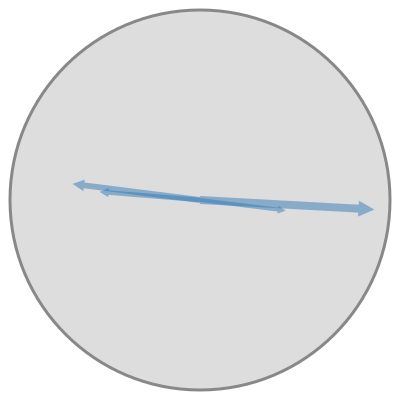

In [70]:
svg_string = ssa.plot_shapes(grid,mode='Mode 18',states=[f'omega_{it+1}' for it in range(4)])
SVG(svg_string)

## Time domain simulation

In [74]:
grid.ini(params,xy_0='xy_0.json')
grid.eval_preconditioner_ini()
grid.Dt = 0.01
grid.spini(params)        #'H_1':1e8,'H_2':1e8,'H_3':1e8,'H_4':1e8
grid.eval_preconditioner_run()

In [84]:
%%timeit
grid.ini(params)        #'H_1':1e8,'H_2':1e8,'H_3':1e8,'H_4':1e8

grid.run( 1.0,{'v_ref_1': 1.03})        #'H_1':1e8,'H_2':1e8,'H_3':1e8,'H_4':1e8
grid.run(15.0,{'v_ref_1': 1.03*1.05})
grid.post()

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mNameError: name 'jac_trap_eval' is not defined[0m

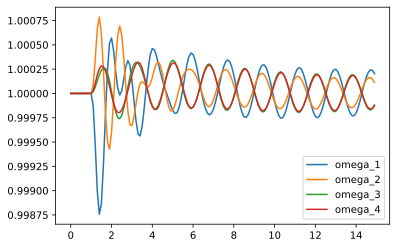

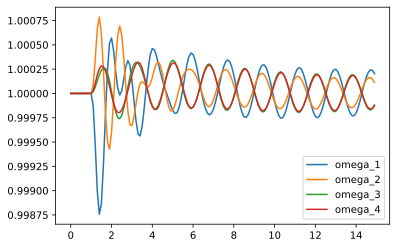

In [81]:
#grid = k12p6_pss_class()

fig,axes = plt.subplots()
axes.plot(grid.Time,grid.get_values('omega_1'),label='omega_1')
axes.plot(grid.Time,grid.get_values('omega_2'),label='omega_2')
axes.plot(grid.Time,grid.get_values('omega_3'),label='omega_3')
axes.plot(grid.Time,grid.get_values('omega_4'),label='omega_4')
axes.legend()
fig

In [12]:
import ipywidgets
%matplotlib widget

In [28]:
grid = k12p6_pss_class()

K_delta = 0.001
K_sec = 0.1
K_a = 200.0
T_r = 0.02
D = 0.1

params = {'P_7':-967e6,'P_9':-1_767e6,'Q_7':100e6,'Q_9':250e6,
                  'K_delta_1':K_delta,'K_delta_2':K_delta,
                  'K_delta_3':K_delta,'K_delta_4':K_delta,
                  'K_a_1':K_a,'K_a_2':K_a,'K_a_3':K_a,'K_a_4':K_a,
                  #'T_r_1':T_r,'T_r_2':T_r,'T_r_3':T_r,'T_r_4':T_r,
                  'p_c_1':701.4/900,'p_c_2':701.4/900,'p_c_4':701.4/900,
                  #'v_ref_1':1.03,'v_ref_2':1.01,'v_ref_3':1.03,'v_ref_4':1.01,
                     'K_sec_1':0,'K_sec_2':0,'K_sec_3':K_sec,'K_sec_4':0,
                  'K_imw_1':0.01, 'K_imw_2':0.01,'K_imw_3':0.0, 'K_imw_4':0.01,
                  'D_1':D,'D_2':D,'D_3':D,'D_4':D
                    }


T_1 = 0.64
T_2 = 0.15
K_stab = 10
grid.set_values({'K_stab_1':K_stab,'K_stab_2':K_stab,'K_stab_3':K_stab,'K_stab_4':K_stab})
grid.set_values({'T_1_1':T_1,'T_1_2':T_1,'T_1_3':T_1,'T_1_4':T_1})
grid.set_values({'T_2_1':T_2,'T_2_2':T_2,'T_2_3':T_2,'T_2_4':T_2})

fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('omega_1'),label='omega_1')
axes.plot(grid.T,grid.get_values('omega_2'),label='omega_2')
axes.plot(grid.T,grid.get_values('omega_3'),label='omega_3')
axes.plot(grid.T,grid.get_values('omega_4'),label='omega_4')
axes.legend()
fig

True

In [16]:
plt.ioff()
plt.clf()

fig,axes = plt.subplots()

K_delta,K_sec = 0.001,0.001
K_a = 100.0
K_stab = 10
T_1 = 0.2

grid.initialize([{'K_a_1':K_a,'K_a_2':K_a,'K_a_3':K_a,'K_a_4':K_a,
                  'K_stab_1':K_stab,'K_stab_2':K_stab,'K_stab_3':K_stab,'K_stab_4':K_stab,
                  'T_1_1':T_1,'T_1_2':T_1,'T_1_3':T_1,'T_1_4':T_1}],
                   xy_0_dict,compile=True)

ssa.eval_A(grid)
damp = ssa.damp_report(grid)
eig_values,eig_vectors = np.linalg.eig(grid.A)

fig.tight_layout()

fig = ssa.plot_eig(grid,x_min=-2,x_max=0.01,y_min=0,y_max=1.5);
ax = fig.axes[0]
eigen_plot = ax.get_children()[8]


sld_T_1  = ipywidgets.FloatSlider(orientation='horizontal',description = "T_1", 
                                value=0.1, min=0.05,max= 2.0, 
                                step=0.01)


sld_T_2  = ipywidgets.FloatSlider(orientation='horizontal',description = "T_2", 
                                value=0.1, min=0.05,max= 2.0, 
                                step=0.01)

sld_K_stab  = ipywidgets.FloatSlider(orientation='horizontal',description = "K_stab", 
                                value=0.0, min=0.0,max= 19.0, 
                                step=0.1)

ckbox_gain = ipywidgets.Checkbox(
    value=False,
    description='Gain compensation',
    disabled=False
)

txt_damp = ipywidgets.Text(
    value='0.0',
    placeholder='Type something',
    description='Damping:',
    disabled=False)

def update(change):
    
    T_1 = sld_T_1.value
    T_2 = sld_T_2.value
    K_stab  = sld_K_stab.value
 
    grid.set_values({'K_stab_1':K_stab,'K_stab_2':K_stab,'K_stab_3':K_stab,'K_stab_4':K_stab})
    grid.set_values({'T_1_1':T_1,'T_1_2':T_1,'T_1_3':T_1,'T_1_4':T_1})
    grid.set_values({'T_2_1':T_2,'T_2_2':T_2,'T_2_3':T_2,'T_2_4':T_2})

    grid.ss()
    grid.eval_jacobians()
    ssa.eval_A(grid)
    eig_values,eig_vectors = np.linalg.eig(grid.A)
    
    eigen_plot.set_data(eig_values.real,eig_values.imag/(2*np.pi))

    zetas = -eig_values.real/np.abs(eig_values) 

    txt_damp.value = f'{100*np.min(zetas):4.1f}'
    
    fig.canvas.draw_idle()
      
sld_T_1.observe(update, names='value')
sld_T_2.observe(update, names='value')
sld_K_stab.observe(update, names='value')
ckbox_gain.observe(update, names='value')

layout_row1 = ipywidgets.HBox([fig.canvas])
layout_row2 = ipywidgets.HBox([sld_T_1,sld_T_2, sld_K_stab])
layout_row3 = ipywidgets.HBox([txt_damp])
layout = ipywidgets.VBox([layout_row1,layout_row2,layout_row3])
layout

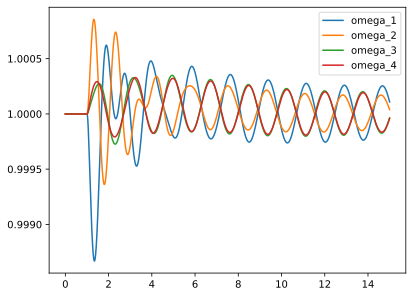

In [25]:
grid.simulate([
         {'t_end': 1.0,'v_ref_1': 1.03, 'Dt':0.01,'decimation':1,
         #'H_1':1e8,'H_2':1e8,'H_3':1e8,'H_4':1e8
         },
         {'t_end':15.0,'v_ref_1': 1.03*1.05}],'prev');

fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('omega_1'),label='omega_1')
axes.plot(grid.T,grid.get_values('omega_2'),label='omega_2')
axes.plot(grid.T,grid.get_values('omega_3'),label='omega_3')
axes.plot(grid.T,grid.get_values('omega_4'),label='omega_4')
axes.legend()
fig

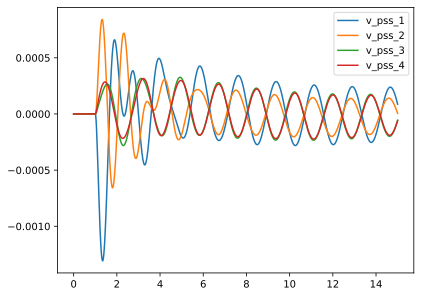

In [26]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('v_pss_1'),label='v_pss_1')
axes.plot(grid.T,grid.get_values('v_pss_2'),label='v_pss_2')
axes.plot(grid.T,grid.get_values('v_pss_3'),label='v_pss_3')
axes.plot(grid.T,grid.get_values('v_pss_4'),label='v_pss_4')
axes.legend()
fig

## PSS design

In [239]:
grid = k12p6_class()

K_delta = 0.001
K_sec = 0.01
K_a = 300.0
T_r = 0.02
D = 1
grid.initialize([{'Dt':0.01,'decimation':1,
                      'P_7':-967e6,'P_9':-1_767e6,'Q_7':100e6,'Q_9':250e6,
                  'K_delta_1':K_delta,'K_delta_2':K_delta,
                  'K_delta_3':K_delta,'K_delta_4':K_delta,
                  'K_a_1':K_a,'K_a_2':K_a,'K_a_3':K_a,'K_a_4':K_a,
                  'T_r_1':T_r,'T_r_2':T_r,'T_r_3':T_r,'T_r_4':T_r,
                  'p_c_1':700/900,'p_c_2':700/900,'p_c_4':700/900,
                  'v_ref_1':1.03,'v_ref_2':1.01,'v_ref_3':1.03,'v_ref_4':1.01,
                  'v_pss_1':0,'v_pss_3':0,
                  'K_sec_1':0,'K_sec_2':0,'K_sec_3':K_sec,'K_sec_4':0,
                  'D_1':D,'D_2':D,'D_3':D,'D_4':D}],
                   xy_0_dict,compile=True)

grid.simulate([
         {'t_end': 1.0,'v_ref_1': 1.03, 
         #'H_1':1e8,'H_2':1e8,'H_3':1e8,'H_4':1e8
         },
         {'t_end':15.0,'v_ref_1': 1.03*1.05}],'prev');

In [240]:
V_1_ini = grid.get_values('V_1')[0]
V_1_end = grid.get_values('V_1')[-1]
ΔV_1 = V_1_end - V_1_ini
ΔV_1_e = (1-1/np.e)*ΔV_1
V_1_e = ΔV_1_e + V_1_ini
idx = np.argmax(grid.get_values('V_1')>V_1_e)
Tau_V = grid.T[idx] -1


# K_a = 150 V,p_e 0.08,0.11 0.09
# K_a = 100 V,p_e 0.13,0.16 
# K_a =  50  0.25,0.31 0.22
p_e_1_ini = grid.get_values('p_e_1')[0]
p_e_1_end = grid.get_values('p_e_1')[-1]
Δp_e_1 = p_e_1_end - p_e_1_ini
Δp_e_1_e = (1-1/np.e)*Δp_e_1
p_e_1_e = Δp_e_1_e + p_e_1_ini
idx = np.argmax(grid.get_values('p_e_1')>p_e_1_e)
Tau_p_e = grid.T[idx] -1   


Tau = Tau_p_e

w = 2*np.pi*0.5
phi_sm = np.angle(1/(Tau*1j*w+1))
T_2 = 0.1

def res(x):
    T_1 = x
    phi = np.angle((T_1*1j*w+1)/(T_2*1j*w+1))
    return phi + phi_sm

T_1 = sopt.newton(res,0.1)[0]

gain_l = np.abs((T_1*1j*w+1)/(T_2*1j*w+1))
gain_l

gain_p = np.abs((1)/(Tau*1j*w+1))
gain_p


print(f'T_1 = {T_1:0.2f} s')
print(f'T_2 = {T_2:0.2f} s')

T_1 = 0.11 s
T_2 = 0.10 s


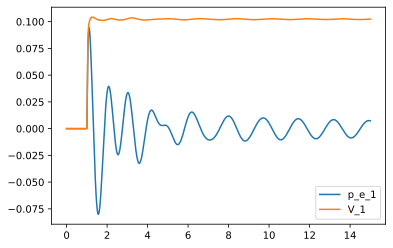

In [241]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('p_e_1')-grid.get_values('p_e_1')[0],label='p_e_1')
axes.plot(grid.T,2*(grid.get_values('V_1')-grid.get_values('V_1')[0]),label='V_1')

#axes.set_xlim((0,3))
axes.legend()

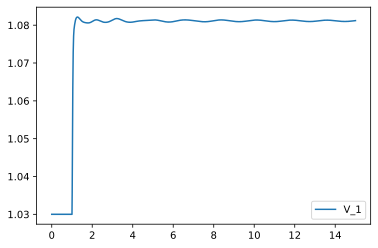

In [242]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('V_1'),label='V_1')
#axes.set_xlim((0,3))
axes.legend()

### PSS simulation

In [243]:
Δt = 0.01  # latencia del control (cada cuanto se ejecuta el controlador)
grid_pss = k12p6_class()
times = np.arange(0,15,Δt)   # tiempos para los cuales se ejecutará el control 
                             # (en este caso la simulación sera de 15 s)

K_delta = 0.001
K_sec = 0.01
#K_a = 20.0
T_r = 0.02
D = 1
grid_pss.initialize([{'Dt':0.01,'decimation':1,
                      'P_7':-967e6,'P_9':-1_767e6,'Q_7':100e6,'Q_9':250e6,
                  'K_delta_1':K_delta,'K_delta_2':K_delta,
                  'K_delta_3':K_delta,'K_delta_4':K_delta,
                  'K_a_1':K_a,'K_a_2':K_a,'K_a_3':K_a,'K_a_4':K_a,
                  'T_r_1':T_r,'T_r_2':T_r,'T_r_3':T_r,'T_r_4':T_r,
                  'p_c_1':700/900,'p_c_2':700/900,'p_c_4':700/900,
                  'v_ref_1':1.03,'v_ref_2':1.01,'v_ref_3':1.03,'v_ref_4':1.01,
                  'v_pss_1':0,'v_pss_3':0,
                  'K_sec_1':0,'K_sec_2':0,'K_sec_3':K_sec,'K_sec_4':0,
                  'D_1':D,'D_2':D,'D_3':D,'D_4':D}],
                   xy_0_dict,compile=True)

# del estado inicial se guardan las entradas o variables necesarias
v_ref_1_0 = grid_pss.get_value('v_ref_1') # se guarda la tensión de excitación inicial
omega_1_0 = grid_pss.get_value('omega_1') # se guarda la tensión de excitación inicial
omega_3_0 = grid_pss.get_value('omega_3') # se guarda la tensión de excitación inicial

# diseño del control:
## PSS
K_stab_1,K_stab_3 = 70.0/gain_l,70.0/gain_l
x_l_1,x_l_3 = 0.0,0.0
T_1_1,T_1_3 = 0.1,0.1
T_2_1,T_2_3 = 0.1,0.1

V_s = 0*times
U_l = 0*times

it = 0
for t in times:
    
    # perturbaciones o cambios de referencia
    v_ref_1 = v_ref_1_0
    if t>1.0: # se aplica un cambio para t = 1 s 
        #p_m = 1.2*p_m_0  # se propone como nuevo valor de potencia de un 20% más que el valor inicial
        v_ref_1 = 1.2*v_ref_1_0
    
    # medición de la tensión en terminales
    omega_1 = grid_pss.get_value('omega_1')
    omega_3 = grid_pss.get_value('omega_3')
    
    # Ley de control:
    ## PSS 1
    u_l_1 = (omega_1 - omega_1_0)   # medición de velocidad
    x_l_1 = x_l_1 + Δt*(u_l_1 - x_l_1)/T_2_1          # compensador de adelanto        
    v_pss_1 = K_stab_1*(T_1_1/T_2_1*(u_l_1-x_l_1) + x_l_1)
    
    ## PSS 3
    u_l_3 = (omega_3 - omega_3_0)   # medición de velocidad
    x_l_3 = x_l_1 + Δt*(u_l_3 - x_l_3)/T_2_3          # compensador de adelanto        
    v_pss_3 = K_stab_3*(T_1_3/T_2_3*(u_l_3-x_l_3) + x_l_3)
    
    # se actualiza v_f y se ejecuta la simulación para el nuevo tiempo t    
    events=[{'t_end':t,'v_pss_1':v_pss_1,'v_pss_3':v_pss_3,'v_ref_1':v_ref_1}]
    grid_pss.run(events)
    
    U_l[it] = u_l_1
    V_s[it] = v_pss_1
    it += 1

grid_pss.post();

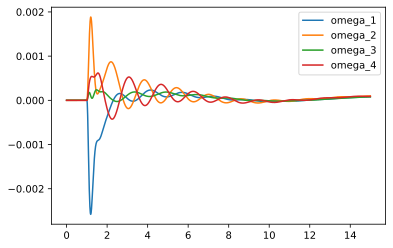

In [244]:
fig,axes = plt.subplots()
axes.plot(grid_pss.T,grid_pss.get_values('omega_1')-1,label='omega_1')
axes.plot(grid_pss.T,grid_pss.get_values('omega_2')-1,label='omega_2')
axes.plot(grid_pss.T,grid_pss.get_values('omega_3')-1,label='omega_3')
axes.plot(grid_pss.T,grid_pss.get_values('omega_4')-1,label='omega_4')
axes.legend()

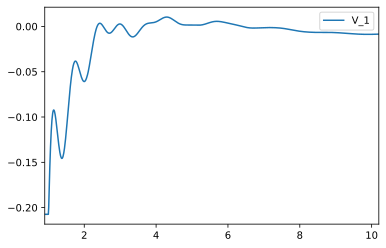

In [236]:
fig,axes = plt.subplots()
axes.plot(grid_pss.T,grid_pss.get_values('V_1')-grid_pss.get_values('V_1')[-1],label='V_1')
axes.set_xlim(0.9,10.2)
axes.legend()

In [ ]:
#ciclos = 1/(2*pi*zeta)
ciclos = 2
zeta = 1/(2*np.pi*ciclos)
zeta

In [ ]:
-0.003*0.37

Printing pass timings for JITCodeLibrary('foo')
Total time: 0.0412
== #0 Function passes on '_ZN8__main__8foo$2476Ex'
 Percent: 4.6%
 Total 0.0019s
 Top timings:
   0.0015s ( 77.4%) SROA
   0.0002s (  8.6%) Early CSE
   0.0001s (  5.5%) Simplify the CFG
   0.0000s (  2.3%) Dominator Tree Construction #2
   0.0000s (  2.2%) Normalize NRT refops
== #1 Function passes on '_ZN7cpython8__main__8foo$2476Ex'
 Percent: 0.7%
 Total 0.0003s
 Top timings:
   0.0001s ( 38.2%) Simplify the CFG #2
   0.0001s ( 23.7%) Early CSE #2
   0.0000s ( 16.0%) SROA
   0.0000s (  6.0%) Post-Dominator Tree Construction #2
   0.0000s (  5.6%) Dominator Tree Construction #3
== #2 Function passes on 'cfunc._ZN8__main__8foo$2476Ex'
 Percent: 0.5%
 Total 0.0002s
 Top timings:
   0.0001s ( 33.9%) Simplify the CFG #3
   0.0001s ( 33.9%) Early CSE #3
   0.0000s (  6.9%) Post-Dominator Tree Construction #3
   0.0000s (  6.1%) Dominator Tree Construction #5
   0.0000s (  4.9%) SROA #2
== #3 Module passes (cheap optimizati